In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

import category_encoders as ce
from category_encoders import TargetEncoder, CatBoostEncoder, LeaveOneOutEncoder

%matplotlib inline 

# 1) Dataset Preprocessing and Exploration 


In [2]:
spotify_data = pd.read_csv("dataset.csv") # Import the dataset 
spotify_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
spotify_data.isna().sum() # Checking NaN values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
spotify_data[spotify_data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [5]:
spotify_data = spotify_data.drop(columns='Unnamed: 0', axis=1).dropna() # Remove 'Unnamed: 0' column and NaN values

In [6]:
# Some statistics about the dataset (just numerical variables)

spotify_data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.239,22.305,0.000,17.000,35.000,50.000,100.000
duration_ms,113999.0,228031.153,107296.058,8586.000,174066.000,212906.000,261506.000,5237295.000
danceability,113999.0,0.567,0.174,0.000,0.456,0.580,0.695,0.985
energy,113999.0,0.641,0.252,0.000,0.472,0.685,0.854,1.000
key,113999.0,5.309,3.560,0.000,2.000,5.000,8.000,11.000
loudness,113999.0,-8.259,5.029,-49.531,-10.013,-7.004,-5.003,4.532
mode,113999.0,0.638,0.481,0.000,0.000,1.000,1.000,1.000
speechiness,113999.0,0.085,0.106,0.000,0.036,0.049,0.084,0.965
acousticness,113999.0,0.315,0.333,0.000,0.017,0.169,0.597,0.996
instrumentalness,113999.0,0.156,0.310,0.000,0.000,0.000,0.049,1.000


In [7]:
# General info about the dataset

spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [8]:
# Some statistics about categorical features

spotify_data.describe(include=['bool', 'object']).T

,count,unique,top,freq
track_id,113999,89740,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
explicit,113999,2,False,104252
track_genre,113999,114,acoustic,1000


In [9]:
# Checking for duplicated values of 'track_id'

spotify_data.loc[spotify_data.duplicated(subset="track_id"), "track_id"].unique() 

array(['0CDucx9lKxuCZplLXUz0iX', '2aibwv5hGXSgw7Yru8IYTO',
       '5E30LdtzQTGqRvNd7l6kG5', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [10]:
# Check for example the track '5E30LdtzQTGqRvNd7l6kG5'

spotify_data[spotify_data['track_id'] == '5E30LdtzQTGqRvNd7l6kG5']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,alt-rock
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,alternative
91100,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,rock


In [11]:
# Create a df with only track_id and track_genre one-hot encoded

genres = pd.get_dummies(spotify_data[["track_id", "track_genre"]], columns=['track_genre'], dtype=int)

In [12]:
# Create a new df group by 'track_id' and sum one-hot encoded genres 

track_genre_df = genres.groupby('track_id', as_index=False).sum()

In [13]:
# Create a df without 'track_genre' and drop duplicated 'track_id'

no_track_genre_df = spotify_data.drop(columns=['track_genre']).drop_duplicates(subset=['track_id'])

In [14]:
# Merge no_track_genre_df and track_genre_df and drop 'track_id'

spotify_data = pd.merge(no_track_genre_df, track_genre_df, on=['track_id'], how='inner').drop(columns="track_id")
spotify_data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0,0,0,0,0,0,0,0,0,1
89736,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0,0,0,0,0,0,0,0,0,1
89737,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0,0,0,0,0,0,0,0,0,1
89738,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# One column per each unique genre

spotify_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 132 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    artists                        object 
 1    album_name                     object 
 2    track_name                     object 
 3    popularity                     int64  
 4    duration_ms                    int64  
 5    explicit                       bool   
 6    danceability                   float64
 7    energy                         float64
 8    key                            int64  
 9    loudness                       float64
 10   mode                           int64  
 11   speechiness                    float64
 12   acousticness                   float64
 13   instrumentalness               float64
 14   liveness                       float64
 15   valence                        float64
 16   tempo                          float64
 17   time_signature               

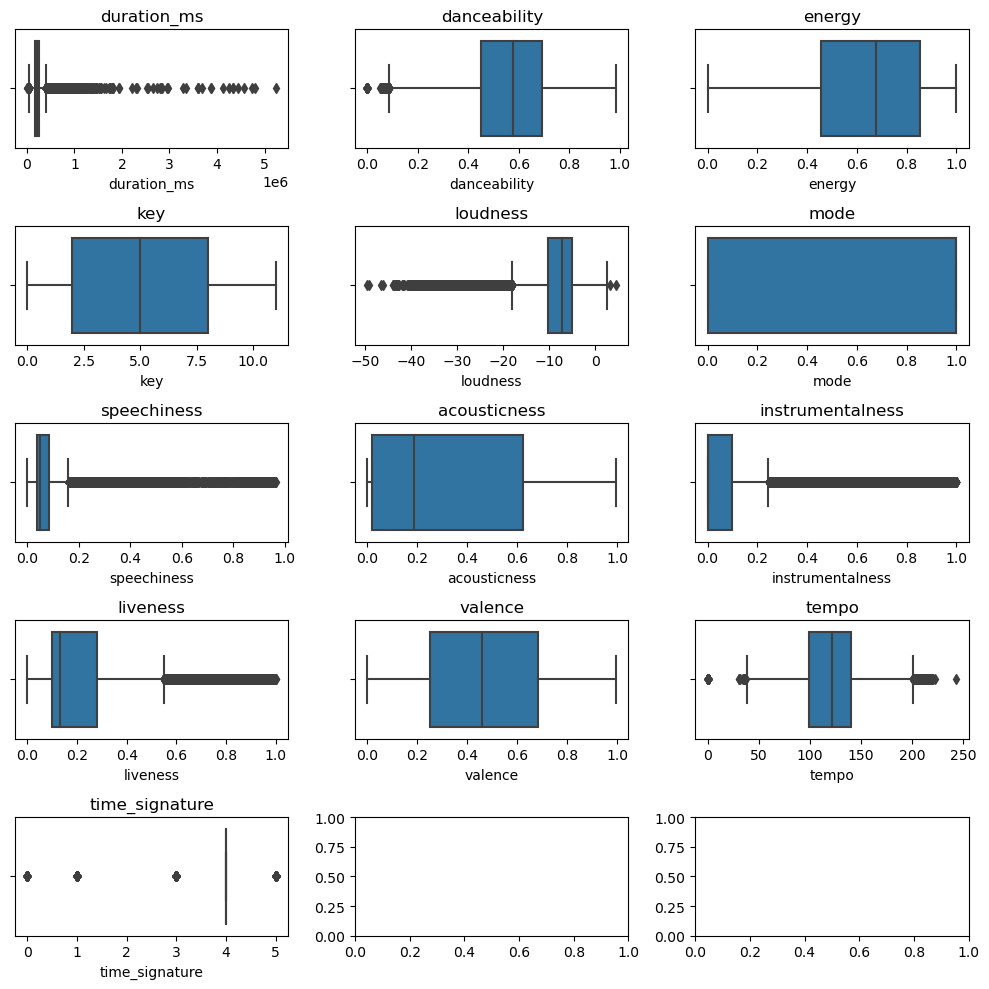

In [16]:
# Boxplot for numerical variables (checking outliers)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))  # Create a grid of subplots with 5 rows and 3 cols
columns_of_interest = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'tempo', 'time_signature']

for i, column in enumerate(columns_of_interest):
    row = i // 3
    col = i % 3
    sns.boxplot(x=spotify_data[column], ax=axes[row, col])
    axes[row, col].set_title(column)  # Create a boxplot for each column in the list

plt.tight_layout()
plt.show()

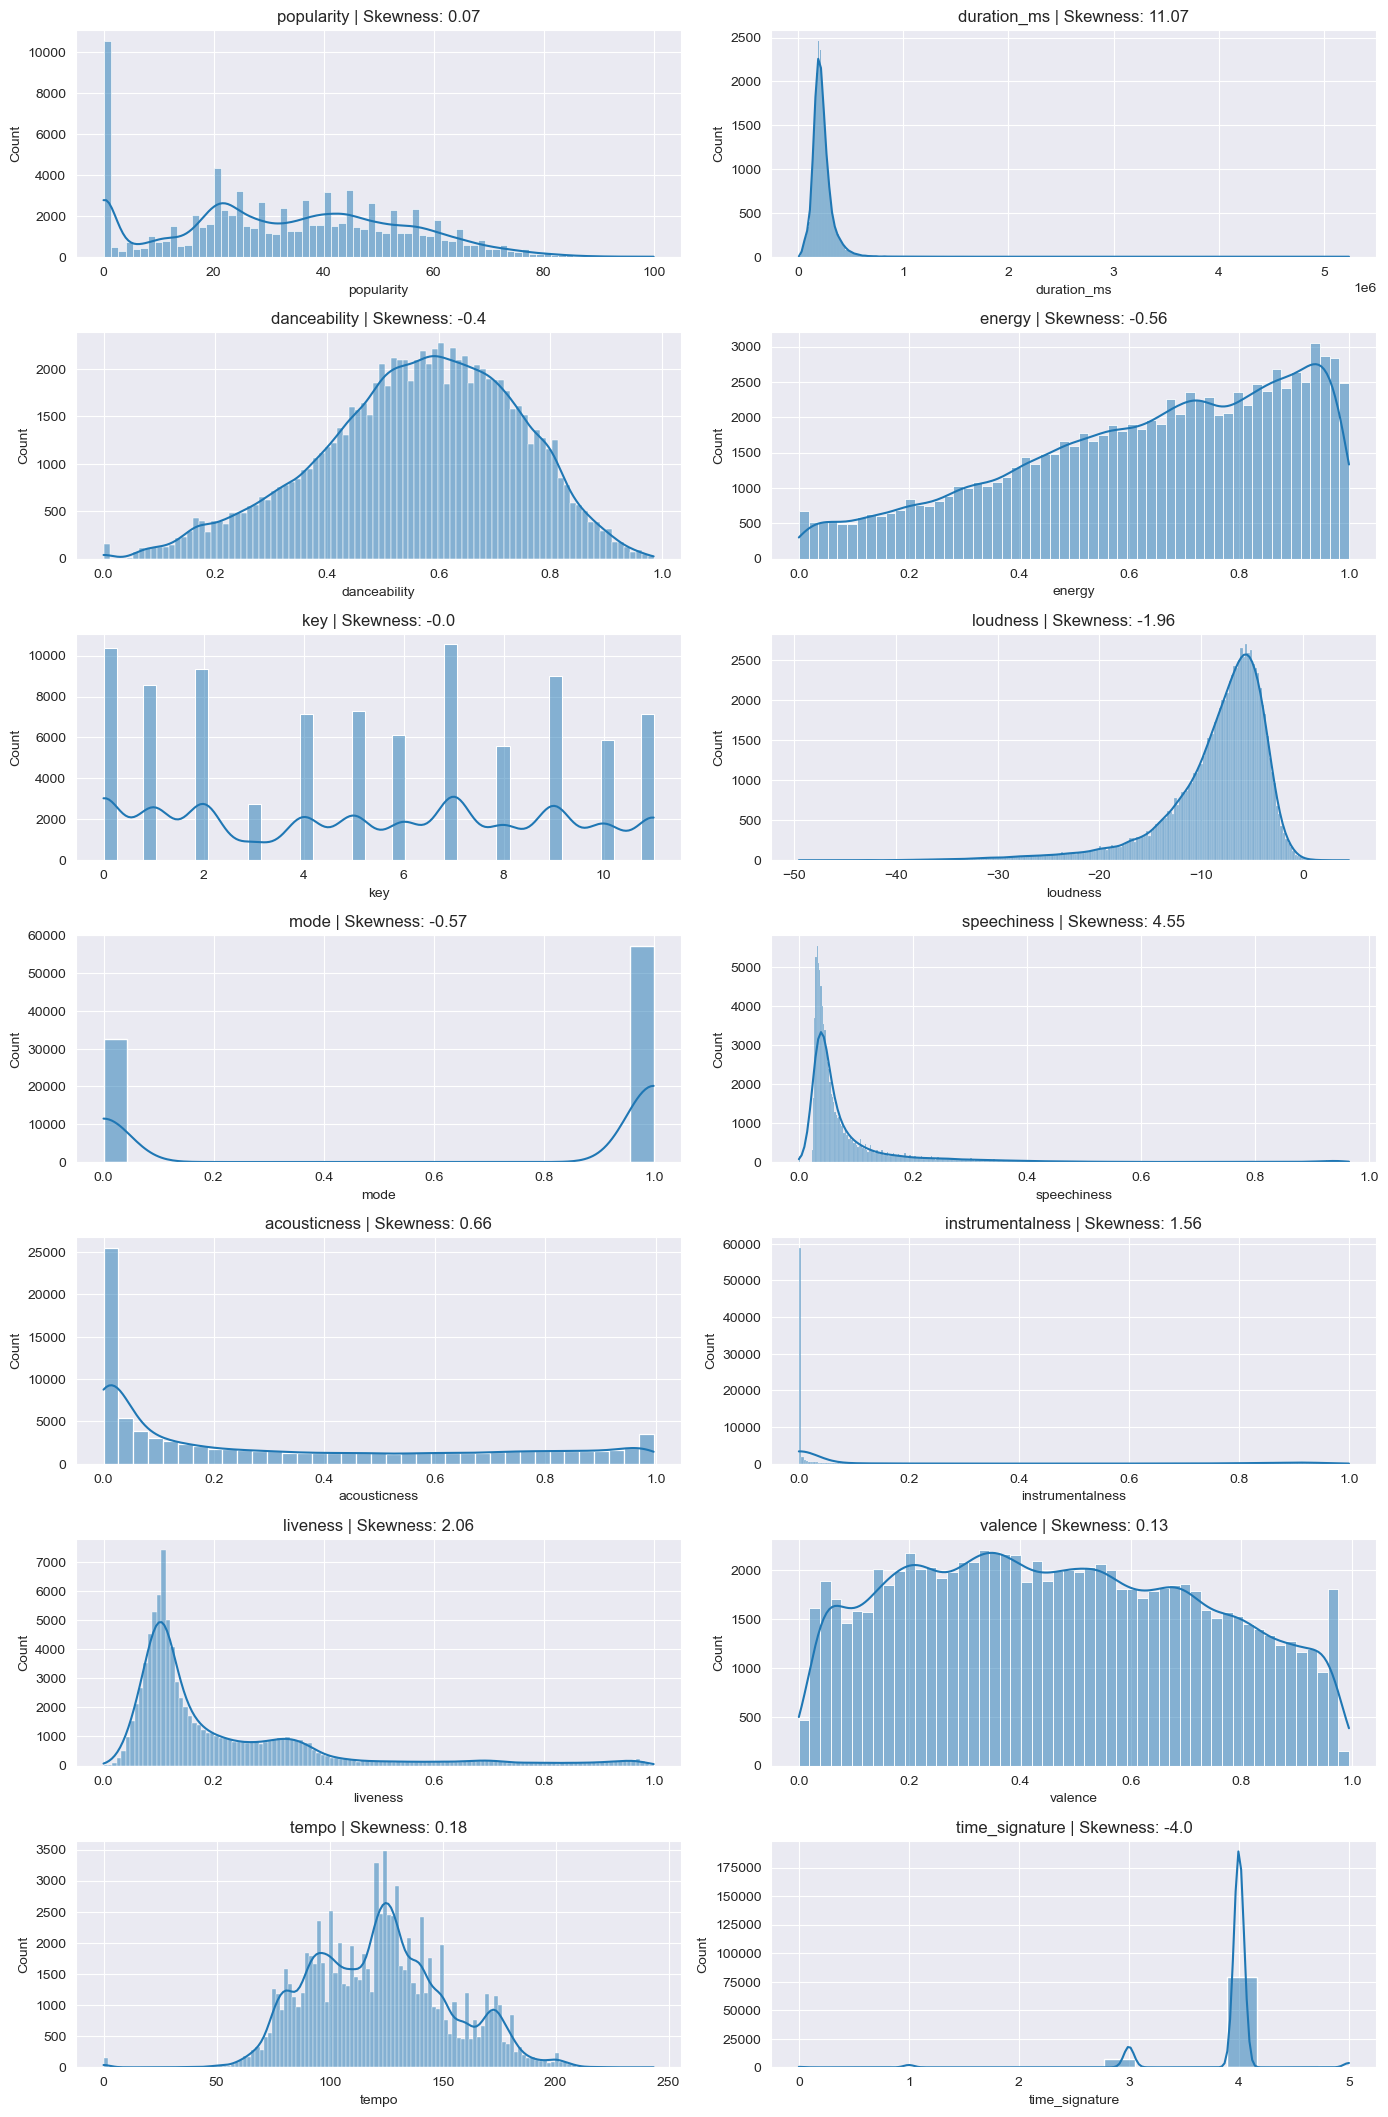

In [17]:
# Plotting the distribution of numerical variables (skewness)

sns.set_style("darkgrid")
 
numerical_columns = spotify_data.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(spotify_data[feature].skew(), 2)}") # Create a skewness plot for each column
    
plt.tight_layout()
plt.show()

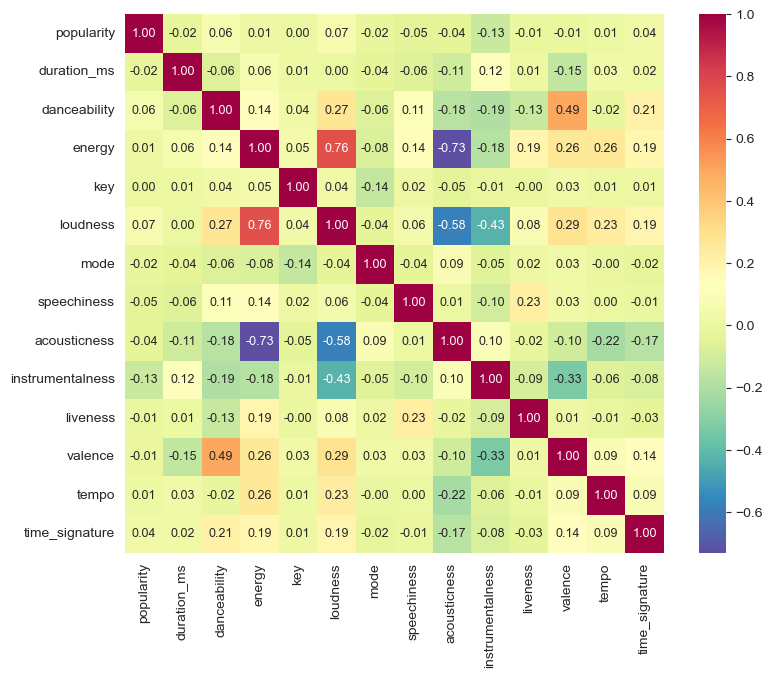

In [18]:
# Correlation matrix (checking multicollinearity)

cat_col = ['artists', 'album_name', 'track_name', 'explicit'] \
          + [i for i in spotify_data.columns if i.startswith('track_genre_')] # Categorical columns to exclude

corrmat = spotify_data.drop(columns=cat_col).corr()  # Create a correlation matrix
fig, ax = plt.subplots(figsize=(9, 7))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 9}, 
                 yticklabels= corrmat.columns, 
                 xticklabels= corrmat.columns,
                 cmap="Spectral_r") # Some parameters for heatmap() function
plt.show()

## 1.1) Categorical Features Encoding

In [19]:
# Convert 'explicit' in numerical

spotify_data['explicit'] = spotify_data['explicit'].astype(int)  

In [20]:
# Target encoding for 'artists', 'album_name', 'track_name'

target_encoder = ce.TargetEncoder(cols=['artists', 'album_name', 'track_name'])
spotify_data_target = target_encoder.fit_transform(spotify_data, spotify_data['popularity'])

In [21]:
spotify_data_target.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,37.133580,38.377280,38.377280,73,230666,0,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,35.202574,36.035328,35.369298,55,149610,0,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,36.295544,36.295544,36.295544,57,210826,0,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,41.026934,38.117063,37.650208,71,201933,0,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,35.663965,34.346377,37.319713,82,198853,0,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Checking for duplicated columns

duplicated_columns = spotify_data_target.columns.duplicated()
if True in duplicated_columns:
    print(duplicated_columns)
else:
    print("No duplicated columns")

No duplicated columns


In [23]:
# Checking for duplicated rows

duplicated_rows = spotify_data_target.duplicated()
if True in duplicated_rows:
    print(duplicated_rows)
else:
    print("No duplicated rows")

No duplicated rows


## 1.2) Dataset Splitting and Standardization

In [24]:
# Create a list of numerical features to apply the standardization

num_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'time_signature']

In [25]:
# Split the encoded dataset in train and test set

X_train, X_test, y_train, y_test = train_test_split(spotify_data_target.drop('popularity', axis=1),
                                                    spotify_data_target['popularity'],
                                                    test_size=0.2, # 80% training, 20% test
                                                    random_state=0) # Random seed for reproducibility

In [26]:
# Standardization of the training and test set 

scaler = StandardScaler() # Initialization of the scaler
scaler.fit(X_train[num_features]) # Fit on the training set

X_train[num_features] = scaler.transform(X_train[num_features]) # Scale the training set
X_test[num_features] = scaler.transform(X_test[num_features]) # Scale the test set 

In [27]:
# Create a subset of X_train and X_test with only numerical variables

X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

# 2) Ridge Regression from Scratch 

In [28]:
class RidgeRegression:
    """
    Ridge Regression model implementation with methods for fitting, predicting,
    and evaluating the model using mean squared error (MSE), R-squared, and
    cross-validation.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize RidgeRegression object with a regularization parameter alpha.

        Args:
        - alpha: Regularization parameter (default is 1.0).
        """
        self.alpha = alpha
        self.weights_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the Ridge Regression model to the given data.

        Args:
        - X: Features matrix.
        - y: Target values.
        
        Returns:
        - An array-like with the coefficients estimate.

        This method computes the coefficients of the Ridge Regression model
        using the closed-form solution.
        """
        y = y.values.reshape(-1, 1)  # Ensure y is a column vector
        self.intercept_ = np.ones((X.shape[0], 1))  # Compute intercept with 1 on each row
        Xi = np.c_[self.intercept_, X]  # Add column of ones for intercept to the X matrix
        XTX = Xi.T @ Xi  # Compute X^T*X
        XTy = Xi.T @ y  # Compute X^T*y
        I = np.identity(Xi.shape[1])  # Identity matrix
        I[0][0] = 0  # Set first element to 0 to avoid regularization for intercept
        self.weights_ = np.linalg.inv(XTX + self.alpha * I) @ XTy  # Compute weights
        return self.weights_

    def predict(self, X):
        """
        Make predictions using the fitted Ridge Regression model.

        Args:
        - X: Feature matrix for prediction.

        Returns:
        - An array-like with predicted target values.

        This method computes predictions using the learned coefficients.
        """
        intercept = np.ones((X.shape[0], 1))
        X = np.c_[intercept, X]  # Add column of ones for intercept to X matrix
        return (X @ self.weights_).reshape(-1)

    def mse(self, predictions, targets):
        """
        Compute the mean squared error (MSE) between predictions and targets.

        Args:
        - predictions: Predicted values.
        - targets: True target values.

        Returns:
        - Mean squared error.

        This method computes the MSE between predicted and true target values.
        """
        predictions = predictions.reshape(-1)
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        return np.mean((predictions - targets) ** 2)  # Compute MSE = (∑(ŷ_i - y_i)^2)/n

    def r_squared(self, predictions, targets):
        """
        Compute the R-squared coefficient of determination.

        Args:
        - predictions: predicted values.
        - targets: true target values.

        Returns:
        - R-squared value.

        This method computes the R-squared coefficient of determination.
        """
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        predictions = predictions.reshape(-1)
        RSS = np.sum((targets - predictions) ** 2) # Compute the Residual Sum of Squares
        TSS = np.sum((targets - np.mean(targets)) ** 2) # Compute the Total Sum of Squares
        return 1 - (RSS / TSS)


    def cross_validation(self, X, y, alpha_values, n_splits=5):
            """
            Perform k-fold cross-validation to estimate model performance
            for different alpha values.

            Args:
            - X: Feature matrix.
            - y: Target values.
            - alpha_values: List or array of alpha values to test.
            - n_splits: Number of folds for cross-validation (default is 5).

            Returns:
            - Dictionary containing alpha values as keys and average MSE across all folds as values.

            This method computes the average mean squared error (MSE) using k-fold
            cross-validation for each alpha value.
            """
            alpha_cv_mse = {}  # A dictionary to store alpha and corresponding mses
            kf = KFold(n_splits=n_splits)
            for alpha in alpha_values:
                cv_mse = []  # A list to store mses for current alpha
                for train_index, test_index in kf.split(X):
                    # Extract training and test data for the current fold
                    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
                    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

                    # Train the model on the training data
                    self.alpha = alpha  # Set current alpha value
                    self.fit(X_train_fold, y_train_fold)

                    # Make predictions on the test data
                    y_pred_fold = self.predict(X_test_fold)

                    # Calculate the error (MSE) between predictions and target values
                    fold_mse = self.mse(y_pred_fold, y_test_fold)
                    cv_mse.append(fold_mse)

                # Compute the mean of the cross-validated mses for current alpha
                average_cv_mse = np.mean(cv_mse)
                alpha_cv_mse[alpha] = average_cv_mse

            return alpha_cv_mse

# 3) Ridge Regression on Numerical Dataset 

In [29]:
ridge_num = RidgeRegression()  # Default alpha value = 1.0
ridge_num.fit(X_train_num, y_train)  # Fit the model on training set

array([[33.13919378],
       [-0.52995165],
       [ 1.70622948],
       [-0.64387543],
       [ 0.0453213 ],
       [ 0.4572029 ],
       [-0.39968348],
       [-1.3765374 ],
       [-0.51242592],
       [-2.87496642],
       [ 0.09033837],
       [-2.19577828],
       [ 0.19267981],
       [ 0.38348537]])

In [30]:
predictions_train_num = ridge_num.predict(X_train_num) # Make predictions on training set
predictions_test_num = ridge_num.predict(X_test_num) # Make predictions on test set 

In [31]:
mse_train_num = ridge_num.mse(predictions_train_num, y_train) # Compute training mean squared error
mse_test_num = ridge_num.mse(predictions_test_num, y_test) # Compute test mean squared error

In [32]:
print(f'Training MSE: {mse_train_num}') 
print(f'Test MSE: {mse_test_num}')

Training MSE: 408.06313416631775
Test MSE: 418.976404949378


In [33]:
rsquared_train_num = ridge_num.r_squared(predictions_train_num, y_train) # Compute training R^2 
rsquared_test_num = ridge_num.r_squared(predictions_test_num, y_test) # Compute test R^2

In [34]:
print(f'Training R^2: {rsquared_train_num}') 
print(f'Test R^2: {rsquared_test_num}')

Training R^2: 0.03126819351646681
Test R^2: 0.031898782025569505


## 3.1) Alpha Tuning on Numerical Dataset

In [35]:
alphas = 10**np.linspace(10, -2, 100)*0.5  # A list of possible alpha values from 10^10 to 10^-2 scaled by 0.5

train_errors_num = []
test_errors_num = []    # Lists for storing errors (MSE)
train_rsquared_num = []
test_rsquared_num = []  # Lists for storing r_squareds
 
# For each alpha value fit the model and compute the mean squared error (MSE) and R^2
for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train_num, y_train)
    
    # Compute training MSE and R^2
    train_pred = model.predict(X_train_num)
    train_mse = model.mse(train_pred, y_train)
    train_R_2_num = model.r_squared(train_pred, y_train)
    train_errors_num.append(train_mse)
    train_rsquared_num.append(train_R_2_num)
    
    # Compute test MSE and R^2
    test_pred = model.predict(X_test_num)
    test_mse = model.mse(test_pred, y_test)
    test_R_2_num = model.r_squared(test_pred, y_test)
    test_errors_num.append(test_mse)
    test_rsquared_num.append(test_R_2_num)

In [36]:
# Searching the best alpha

idx_min_num = np.argmin(test_errors_num) 
best_alpha_num = alphas[idx_min_num]
print(f'The best alpha value for the Numerical dataset is {best_alpha_num} with a test MSE = {min(test_errors_num)}\
 and a Test R^2 = {max(test_rsquared_num)}')

The best alpha value for the Numerical dataset is 0.005 with a test MSE = 418.97640177969504 and a Test R^2 = 0.031898789349547374


### 3.1.1) Numerical Dataset Plots

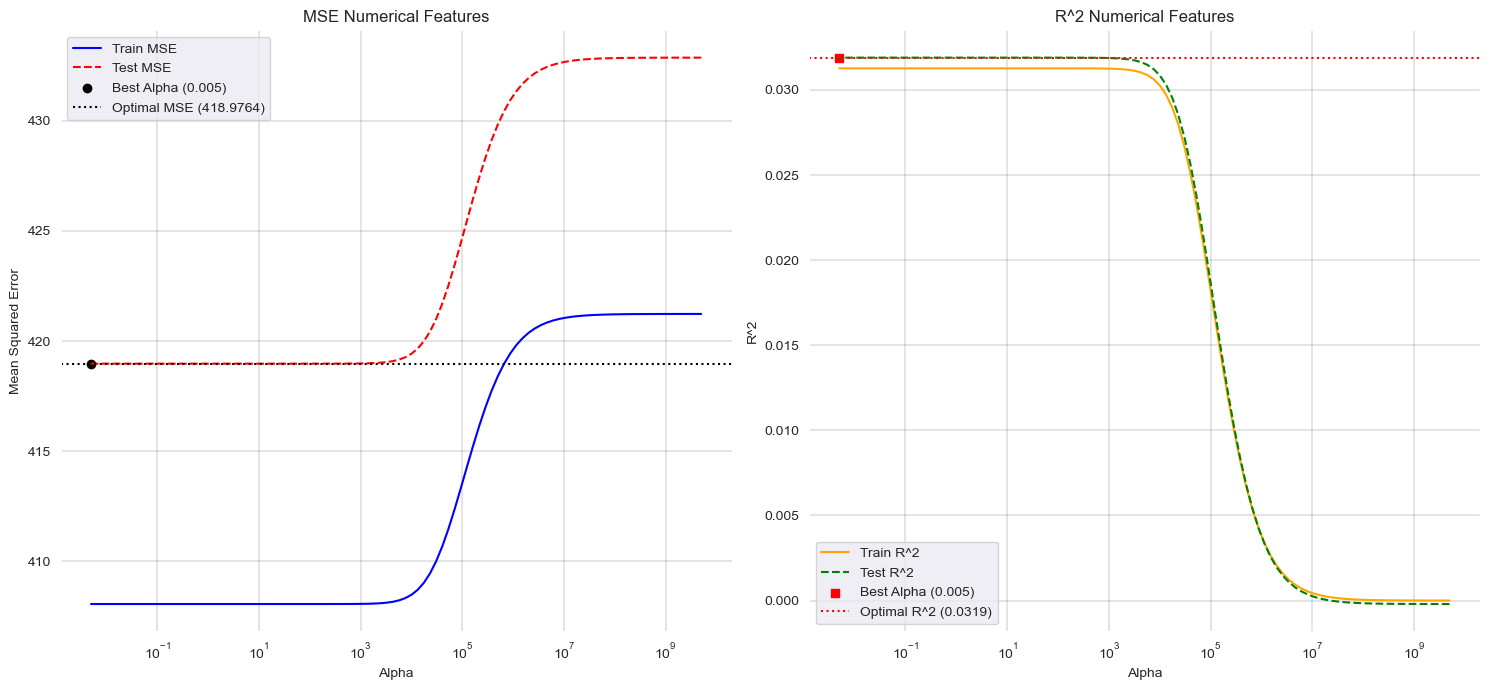

In [37]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors_num, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, test_errors_num, label='Test MSE', color='red', linestyle='--')
ax1.scatter(best_alpha_num, min(test_errors_num), color='black', label=f'Best Alpha ({best_alpha_num})', marker='o')
ax1.axhline(y=min(test_errors_num), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors_num):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Numerical Features')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, train_rsquared_num, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, test_rsquared_num, label='Test R^2', color='green', linestyle='--')
ax2.scatter(best_alpha_num, max(test_rsquared_num), color='red', label=f'Best Alpha ({best_alpha_num})', marker='s')
ax2.axhline(y=max(test_rsquared_num), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared_num):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Numerical Features')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 3.2) 5-Fold CV on Numerical Dataset

In [38]:
# Initialize RidgeRegression with the default alpha value
ridge_cv_num = RidgeRegression()

# Perform k-fold cross-validation
alpha_cv_results_num = ridge_cv_num.cross_validation(X_train_num, y_train, alphas)

cv_best_alpha_num = min(alpha_cv_results_num, key=alpha_cv_results_num.get)
cv_best_mse_num = alpha_cv_results_num[cv_best_alpha_num]

print("Best CV alpha value for Numerical dataset:", cv_best_alpha_num)
print("Corresponding average MSE:", cv_best_mse_num)

Best CV alpha value for Numerical dataset: 201.85086292982749
Corresponding average MSE: 408.19883742364266


# 4) Ridge Regression on Target Encoded Dataset 

In [39]:
ridge = RidgeRegression()
ridge.fit(X_train, y_train)  

array([[-7.49597921e+01],
       [ 1.66738568e-01],
       [ 1.50348813e+00],
       [ 1.72759610e+00],
       [-6.24837645e-01],
       [ 3.05361599e-01],
       [ 8.76294996e-02],
       [-6.48617715e-01],
       [ 1.93419444e-02],
       [ 5.57883993e-01],
       [ 8.30820469e-02],
       [-5.32042193e-01],
       [ 1.98373862e-01],
       [-4.41737653e-01],
       [-2.63138375e-01],
       [ 9.46258209e-02],
       [-3.60642261e-02],
       [ 4.82374963e-02],
       [ 6.32123229e-02],
       [-8.69577268e+00],
       [ 2.88829607e+00],
       [-2.08594979e+00],
       [ 2.85570062e+00],
       [ 2.57156279e+00],
       [-7.98268752e+00],
       [-9.02889250e+00],
       [ 4.73562976e+00],
       [ 1.40565415e+00],
       [-9.80282436e+00],
       [ 3.56611425e-01],
       [-4.84381160e+00],
       [-1.29257045e+01],
       [-2.95104444e+00],
       [ 4.78579067e+00],
       [ 2.69708526e+00],
       [-4.92240536e+00],
       [-4.90419475e+00],
       [ 2.18600086e+00],
       [ 1.9

In [40]:
predictions_train = ridge.predict(X_train) 
predictions_test = ridge.predict(X_test) 

In [41]:
mse_train = ridge.mse(predictions_train, y_train) 
mse_test = ridge.mse(predictions_test, y_test) 

In [42]:
print(f'Training MSE: {mse_train}') 
print(f'Test MSE: {mse_test}')

Training MSE: 84.66081871753046
Test MSE: 88.86016609323018


In [43]:
rsquared_train = ridge.r_squared(predictions_train, y_train) 
rsquared_test = ridge.r_squared(predictions_test, y_test) 

In [44]:
print(f'Training R^2: {rsquared_train}') 
print(f'Test R^2: {rsquared_test}')

Training R^2: 0.7990173064220469
Test R^2: 0.7946766595730845


## 4.1) Alpha Tuning on Target Encoded Dataset

In [45]:
# alphas = 10**np.linspace(10, -2, 100)*0.5 --> the same alphas values as before

train_errors = []
test_errors = []
train_rsquared = []
test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_mse = model.mse(train_pred, y_train)
    train_R_2 = model.r_squared(train_pred, y_train)
    train_errors.append(train_mse)
    train_rsquared.append(train_R_2)
    
    test_pred = model.predict(X_test)
    test_mse = model.mse(test_pred, y_test)
    test_R_2 = model.r_squared(test_pred, y_test)
    test_errors.append(test_mse)
    test_rsquared.append(test_R_2)

In [46]:
# Searching the best alpha

idx_min = np.argmin(test_errors)
best_alpha = alphas[idx_min]
print(f'The best alpha value for the Target encoded dataset is {best_alpha} with a test MSE = {min(test_errors)} and\
 test R^2 = {max(test_rsquared)}')

The best alpha value for the Target encoded dataset is 0.005 with a test MSE = 88.85784239391405 and test R^2 = 0.7946820287922376


### 4.1.1) Target Encoded Dataset Plots

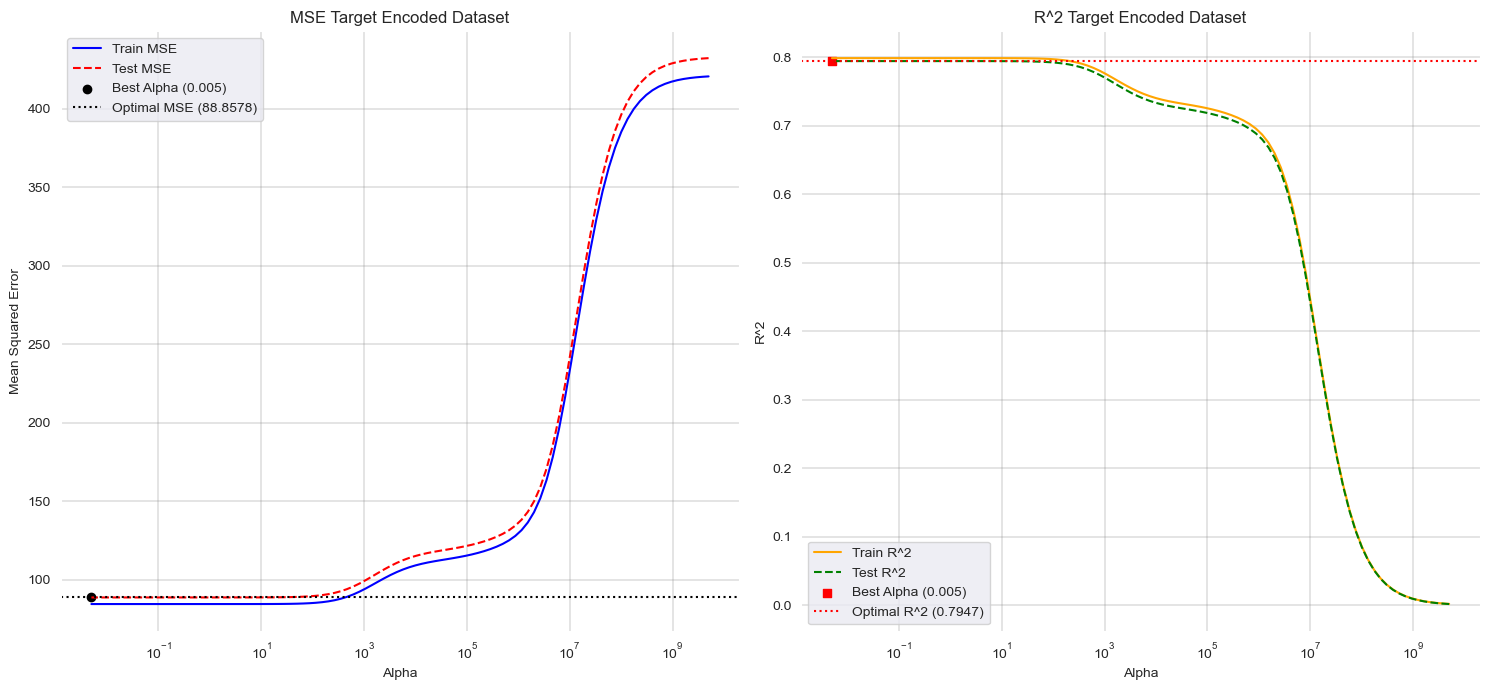

In [47]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(best_alpha, min(test_errors), color='black', label=f'Best Alpha ({best_alpha:.3f})', marker='o')
ax1.axhline(y=min(test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Target Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(best_alpha, max(test_rsquared), color='red', label=f'Best Alpha ({best_alpha:.3f})', marker='s')
ax2.axhline(y=max(test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Target Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 4.2) 5-Fold CV on Target Encoded Dataset

In [48]:
ridge_cv_target = RidgeRegression()

alpha_cv_results_target = ridge_cv_target.cross_validation(X_train, y_train, alphas)

cv_best_alpha_target = min(alpha_cv_results_target, key=alpha_cv_results_target.get)
cv_best_mse_target = alpha_cv_results_target[cv_best_alpha_target]

print("Best CV alpha value for Target encoded dataset:", cv_best_alpha_target)
print("Corresponding average MSE:", cv_best_mse_target)

Best CV alpha value for Target encoded dataset: 1.328043891473342
Corresponding average MSE: 85.0465427426423


# 5) Ridge Regression with Different Encoding Techniques 

## 5.1) Catboost Encoding

In [49]:
# CatBoost Encoding for 'artists', 'album_name', 'track_name'

catboost_encoder = ce.CatBoostEncoder(cols=['artists', 'album_name', 'track_name'])

spotify_data_catboost = catboost_encoder.fit_transform(spotify_data, spotify_data['popularity'])

In [50]:
# Splitting the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(spotify_data_catboost.drop('popularity', axis=1),
                                                        spotify_data_catboost['popularity'],
                                                        test_size=0.2,
                                                        random_state=0) # The same random seed 

In [51]:
# Standardization of the training and test set 

scaler = StandardScaler()

X_train1[num_features] = scaler.fit_transform(X_train1[num_features]) 
X_test1[num_features] = scaler.transform(X_test1[num_features]) 

In [52]:
X_train1

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
87183,46.018073,54.033135,33.198808,0.632498,0,-0.230337,1.000184,1.321792,0.303640,-1.325874,...,0,0,0,0,0,0,0,1,0,0
58622,33.065282,33.198808,33.198808,-0.331479,0,-0.648775,-0.628813,1.040984,-0.836313,0.754219,...,0,0,0,0,0,0,0,0,0,0
54259,34.599404,33.198808,33.198808,0.218638,0,0.335119,1.031361,1.602600,0.991968,0.754219,...,0,0,0,0,0,0,0,0,0,0
78899,67.349901,59.039762,33.198808,-0.280772,0,-0.377356,-1.548534,-1.205482,-0.483647,0.754219,...,0,0,0,0,0,0,0,0,0,0
17724,24.439762,24.439762,33.198808,-0.359914,1,-0.060700,0.883270,-0.363057,0.621918,-1.325874,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,27.732936,28.599404,33.198808,0.756121,0,-0.903230,0.887167,-1.205482,0.260847,0.754219,...,0,0,0,0,0,0,0,0,0,0
45891,33.198808,33.198808,33.198808,0.110435,0,0.555647,1.132686,1.602600,0.963311,-1.325874,...,0,0,0,0,0,0,0,0,0,0
42613,33.198808,33.198808,33.198808,-1.273103,0,-0.202064,0.704003,0.198559,0.119284,-1.325874,...,0,0,0,0,0,0,0,0,0,0
43567,33.198808,33.198808,33.198808,-0.313936,0,0.538684,1.304159,-1.486290,1.021770,0.754219,...,0,0,0,0,0,0,0,0,0,0


### 5.1.1) Model Implementation

In [53]:
catboost_ridge = RidgeRegression()  
catboost_ridge.fit(X_train1, y_train1)  

array([[-3.99305741e+00],
       [ 2.10403529e-01],
       [ 9.33172997e-01],
       [ 1.16771508e-01],
       [-4.92166000e-01],
       [ 1.05910353e+00],
       [ 5.82064510e-01],
       [-6.53989750e-01],
       [ 2.50002689e-02],
       [ 3.44807804e-01],
       [-1.23586944e-01],
       [-3.55215600e-01],
       [-7.15567113e-02],
       [-4.31884578e-01],
       [-5.12068016e-01],
       [-3.55364223e-01],
       [ 3.27683639e-03],
       [ 1.30827414e-01],
       [ 3.36112550e-01],
       [-1.10979224e+01],
       [ 5.74218889e+00],
       [-8.58118478e+00],
       [ 2.61835881e+00],
       [ 3.82848175e+00],
       [-9.91104502e+00],
       [-1.00705176e+01],
       [ 4.50737017e-01],
       [ 4.25125095e+00],
       [-1.32805276e+01],
       [ 9.51892913e-01],
       [-5.43704619e+00],
       [-1.75482761e+01],
       [-4.99277789e+00],
       [ 8.37698527e+00],
       [-5.98811560e+00],
       [-6.68833092e+00],
       [-6.60947911e+00],
       [-1.31349954e+00],
       [-4.0

In [54]:
cat_train_pred = catboost_ridge.predict(X_train1) 
cat_test_pred = catboost_ridge.predict(X_test1)  

In [55]:
cat_mse_train = catboost_ridge.mse(cat_train_pred, y_train1) 
cat_mse_test = catboost_ridge.mse(cat_test_pred, y_test1) 

In [56]:
print(f'Training MSE: {cat_mse_train}') 
print(f'Test MSE: {cat_mse_test}')

Training MSE: 149.0459885979851
Test MSE: 155.29738588872604


In [57]:
cat_rsquared_train = catboost_ridge.r_squared(cat_train_pred, y_train1) 
cat_rsquared_test = catboost_ridge.r_squared(cat_test_pred, y_test1) 

In [58]:
print(f'Training R^2: {cat_rsquared_train}') 
print(f'Test R^2: {cat_rsquared_test}')

Training R^2: 0.6461685026297874
Test R^2: 0.6411645461388553


### 5.1.2) Alpha Tuning

In [59]:
# alphas = 10**np.linspace(10, -2, 100)*0.5 --> the same alphas values 

cat_train_errors = []
cat_test_errors = []
cat_train_rsquared = []
cat_test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train1, y_train1)
    
    cat_train_pred = model.predict(X_train1)
    cat_train_mse = model.mse(cat_train_pred, y_train1)
    cat_train_R_2 = model.r_squared(cat_train_pred, y_train1)
    cat_train_errors.append(cat_train_mse)
    cat_train_rsquared.append(cat_train_R_2)
    
    cat_test_pred = model.predict(X_test1)
    cat_test_mse = model.mse(cat_test_pred, y_test1)
    cat_test_R_2 = model.r_squared(cat_test_pred, y_test1)
    cat_test_errors.append(cat_test_mse)
    cat_test_rsquared.append(cat_test_R_2)

In [60]:
# Searching the best alpha

cat_idx_min = np.argmin(cat_test_errors)
cat_best_alpha = alphas[cat_idx_min]
print(f'The best alpha value for the Catboost encoded dataset is {cat_best_alpha} with a test MSE\
 = {min(cat_test_errors)} and test R^2 = {max(cat_test_rsquared)}')

The best alpha value for the Catboost encoded dataset is 2.320794416806386 with a test MSE = 155.29680560174478 and test R^2 = 0.6411658869698107


### 5.1.3) Plots

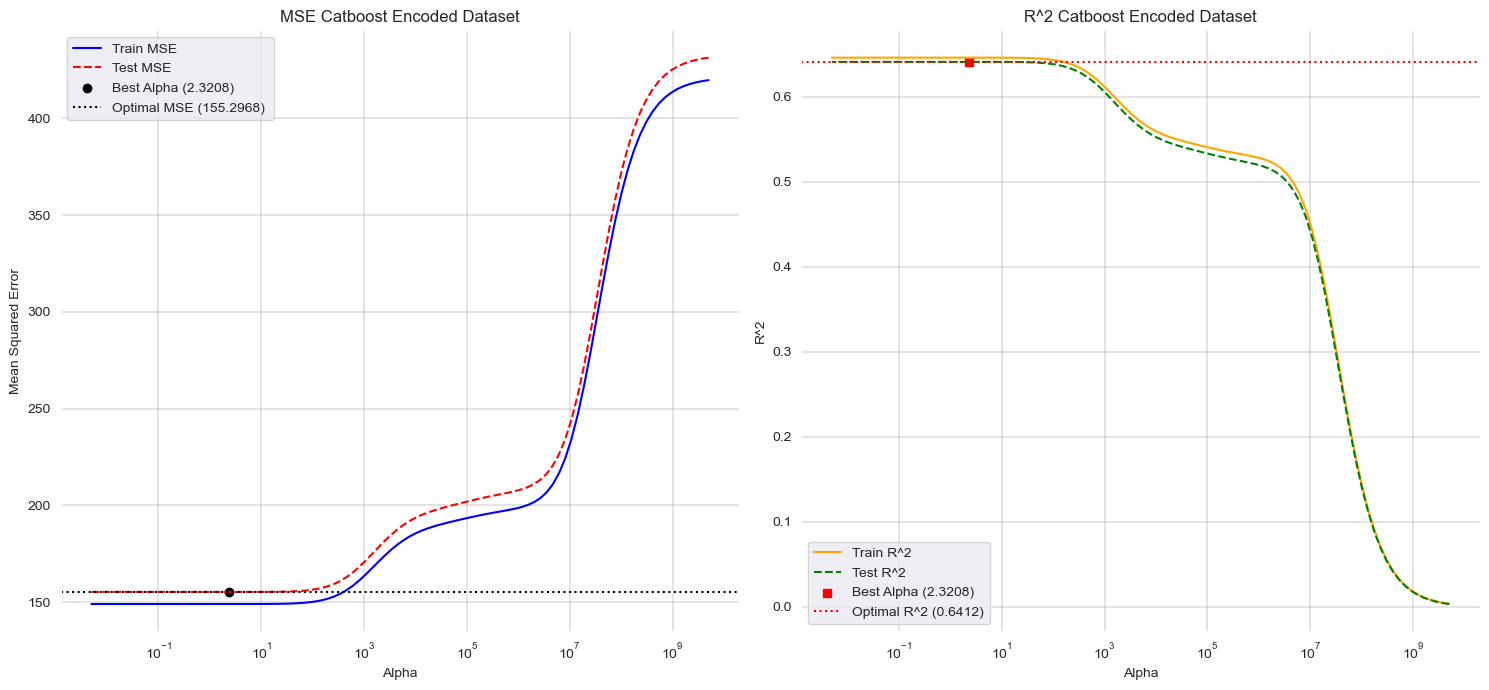

In [61]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, cat_train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, cat_test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(cat_best_alpha, min(cat_test_errors), color='black', label=f'Best Alpha ({cat_best_alpha:.4f})', marker='o')
ax1.axhline(y=min(cat_test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(cat_test_errors):.4f}) ')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Catboost Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, cat_train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, cat_test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(cat_best_alpha, max(cat_test_rsquared), color='red', label=f'Best Alpha ({cat_best_alpha:.4f})', marker='s')
ax2.axhline(y=max(cat_test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(cat_test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Catboost Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5.1.4) 5-Fold CV

In [62]:
ridge_cv_catboost = RidgeRegression()

alpha_cv_results_catboost = ridge_cv_catboost.cross_validation(X_train1, y_train1, alphas)

cv_best_alpha_catboost = min(alpha_cv_results_catboost, key=alpha_cv_results_catboost.get)
cv_best_mse_catboost = alpha_cv_results_catboost[cv_best_alpha_catboost]

print("Best CV alpha value for Catboost encoded dataset:", cv_best_alpha_catboost)
print("Corresponding average MSE:", cv_best_mse_catboost)

Best CV alpha value for Catboost encoded dataset: 1.328043891473342
Corresponding average MSE: 149.71255068906194


## 5.2) Leave-One-Out Encoding

In [63]:
# Leave-one-out Encoding for 'artists', 'album_name', 'track_name'

loo_encoder = ce.LeaveOneOutEncoder(cols=['artists', 'album_name', 'track_name'])

spotify_data_loo = loo_encoder.fit_transform(spotify_data, spotify_data['popularity'])

In [64]:
# Splitting the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(spotify_data_loo.drop('popularity', axis=1),
                                                        spotify_data_loo['popularity'],
                                                        test_size=0.2,
                                                        random_state=0) # The same random seed 

In [65]:
# Standardization of the training and test set 

scaler = StandardScaler()

X_train2[num_features] = scaler.fit_transform(X_train2[num_features]) 
X_test2[num_features] = scaler.transform(X_test2[num_features]) 

In [66]:
X_train2

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
87183,40.000000,52.888889,33.198808,0.632498,0,-0.230337,1.000184,1.321792,0.303640,-1.325874,...,0,0,0,0,0,0,0,1,0,0
58622,27.056818,33.198808,33.198808,-0.331479,0,-0.648775,-0.628813,1.040984,-0.836313,0.754219,...,0,0,0,0,0,0,0,0,0,0
54259,33.000000,33.198808,33.198808,0.218638,0,0.335119,1.031361,1.602600,0.991968,0.754219,...,0,0,0,0,0,0,0,0,0,0
78899,65.300000,64.833333,33.198808,-0.280772,0,-0.377356,-1.548534,-1.205482,-0.483647,0.754219,...,0,0,0,0,0,0,0,0,0,0
17724,21.800000,21.800000,33.198808,-0.359914,1,-0.060700,0.883270,-0.363057,0.621918,-1.325874,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,25.000000,24.000000,33.198808,0.756121,0,-0.903230,0.887167,-1.205482,0.260847,0.754219,...,0,0,0,0,0,0,0,0,0,0
45891,33.198808,33.198808,33.198808,0.110435,0,0.555647,1.132686,1.602600,0.963311,-1.325874,...,0,0,0,0,0,0,0,0,0,0
42613,33.230769,32.000000,33.198808,-1.273103,0,-0.202064,0.704003,0.198559,0.119284,-1.325874,...,0,0,0,0,0,0,0,0,0,0
43567,33.198808,33.198808,33.198808,-0.313936,0,0.538684,1.304159,-1.486290,1.021770,0.754219,...,0,0,0,0,0,0,0,0,0,0


### 5.2.1) Model Implementation

In [67]:
loo_ridge = RidgeRegression()  
loo_ridge.fit(X_train2, y_train2)  

array([[  2.51730459],
       [  0.26459915],
       [  0.72106675],
       [  0.04822304],
       [ -0.43942753],
       [  0.92858404],
       [  0.48386704],
       [ -0.43610542],
       [  0.02548006],
       [  0.02972892],
       [ -0.07333907],
       [ -0.22085984],
       [ -0.04533232],
       [ -0.32845732],
       [ -0.34013944],
       [ -0.17195039],
       [  0.03957853],
       [  0.12863016],
       [  0.29291825],
       [ -6.65720748],
       [  2.7509784 ],
       [ -2.43512666],
       [  1.155743  ],
       [  2.53807592],
       [ -5.5795625 ],
       [ -6.128897  ],
       [  1.31737651],
       [  3.2990551 ],
       [ -8.4055291 ],
       [  0.171841  ],
       [ -3.75763476],
       [-11.00718995],
       [ -3.3698882 ],
       [  5.66466503],
       [ -4.00440679],
       [ -4.71423784],
       [ -3.6110684 ],
       [ -0.42697307],
       [ -1.92063786],
       [  0.23424655],
       [ -1.77713475],
       [  6.15968956],
       [ -8.88114541],
       [  0

In [68]:
loo_train_pred = loo_ridge.predict(X_train2) 
loo_test_pred = loo_ridge.predict(X_test2)  

In [69]:
loo_mse_train = loo_ridge.mse(loo_train_pred, y_train2) 
loo_mse_test = loo_ridge.mse(loo_test_pred, y_test2) 

In [70]:
print(f'Training MSE: {loo_mse_train}') 
print(f'Test MSE: {loo_mse_test}')

Training MSE: 125.12553008994765
Test MSE: 131.0191527175387


In [71]:
loo_rsquared_train = loo_ridge.r_squared(loo_train_pred, y_train2) 
loo_rsquared_test = loo_ridge.r_squared(loo_test_pred, y_test2) 

In [72]:
print(f'Training R^2: {loo_rsquared_train}') 
print(f'Test R^2: {loo_rsquared_test}')

Training R^2: 0.7029550805933849
Test R^2: 0.6972626624662734


### 5.2.2) Alpha Tuning

In [73]:
loo_train_errors = []
loo_test_errors = []
loo_train_rsquared = []
loo_test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train2, y_train2)
    
    loo_train_pred = model.predict(X_train2)
    loo_train_mse = model.mse(loo_train_pred, y_train2)
    loo_train_R_2 = model.r_squared(loo_train_pred, y_train2)
    loo_train_errors.append(loo_train_mse)
    loo_train_rsquared.append(loo_train_R_2)
    
    loo_test_pred = model.predict(X_test2)
    loo_test_mse = model.mse(loo_test_pred, y_test2)
    loo_test_R_2 = model.r_squared(loo_test_pred, y_test2)
    loo_test_errors.append(loo_test_mse)
    loo_test_rsquared.append(loo_test_R_2)

In [74]:
# Searching the best alpha

loo_idx_min = np.argmin(loo_test_errors)
loo_best_alpha = alphas[loo_idx_min]
print(f'The best alpha value for the Leave-One-Out encoded dataset is {loo_best_alpha} with a test\
 MSE = {min(loo_test_errors)} and test R^2 = {max(loo_test_rsquared)}')

The best alpha value for the Leave-One-Out encoded dataset is 5.361336110051605 with a test MSE = 131.01700090419936 and test R^2 = 0.697267634519807


### 5.2.3) Plots

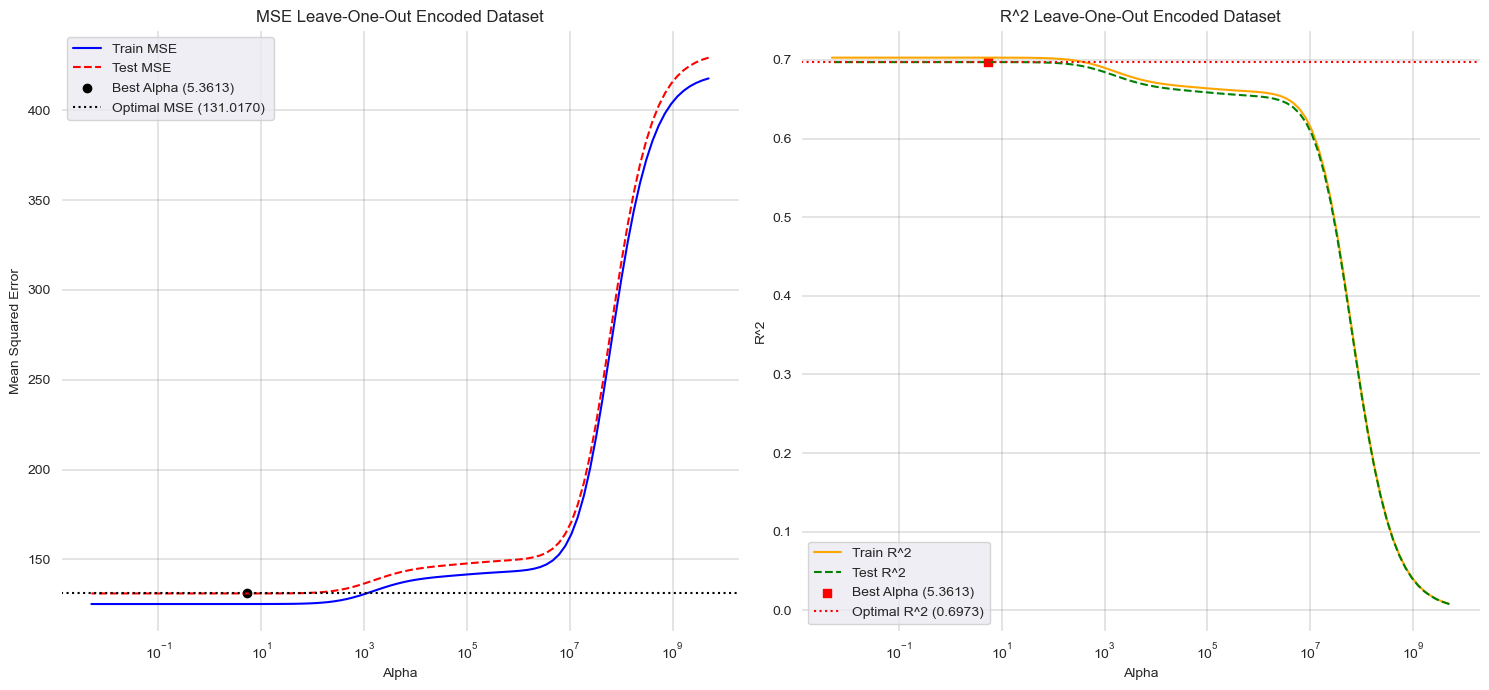

In [75]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, loo_train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, loo_test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(loo_best_alpha, min(loo_test_errors), color='black', label=f'Best Alpha ({loo_best_alpha:.4f})', marker='o')
ax1.axhline(y=min(loo_test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(loo_test_errors):.4f}) ')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Leave-One-Out Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, loo_train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, loo_test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(loo_best_alpha, max(loo_test_rsquared), color='red', label=f'Best Alpha ({loo_best_alpha:.4f})', marker='s')
ax2.axhline(y=max(loo_test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(loo_test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Leave-One-Out Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5.2.4) 5-Fold CV

In [76]:
ridge_cv_loo = RidgeRegression()

alpha_cv_results_loo = ridge_cv_loo.cross_validation(X_train2, y_train2, alphas)

cv_best_alpha_loo = min(alpha_cv_results_loo, key=alpha_cv_results_loo.get)
cv_best_mse_loo = alpha_cv_results_loo[cv_best_alpha_loo]

print("Best CV alpha value for Leave-One-Out encoded dataset:", cv_best_alpha_loo)
print("Corresponding average MSE:", cv_best_mse_loo)

Best CV alpha value for Leave-One-Out encoded dataset: 3.0679536367065814
Corresponding average MSE: 125.60723723570732


# 6) Conclusions 

## 6.1) Training and Test MSE Comparison

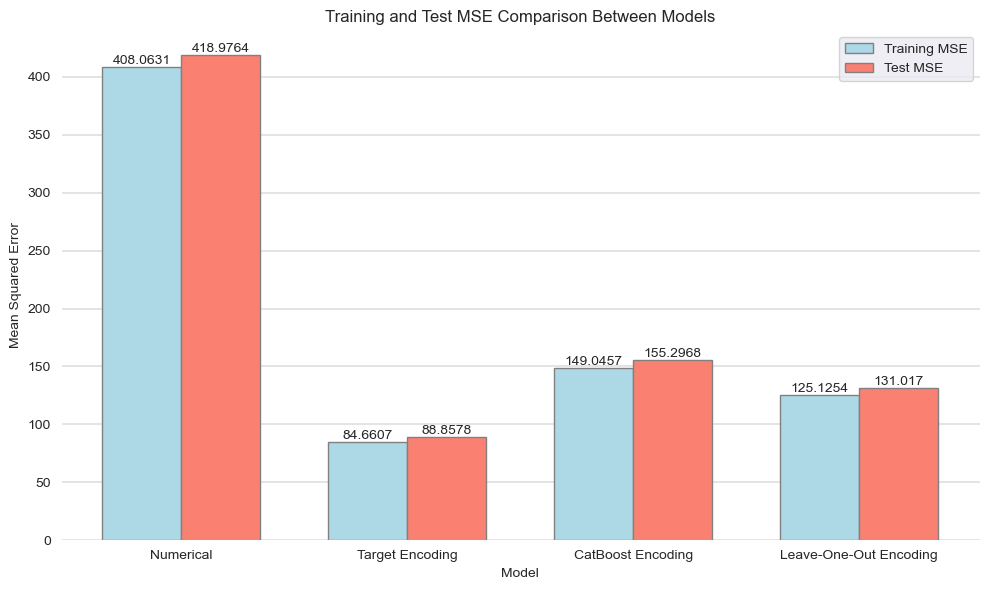

In [77]:
models = ['Numerical', 'Target Encoding', 'CatBoost Encoding', 'Leave-One-Out Encoding']
training_mses = [min(train_errors_num), min(train_errors), min(cat_train_errors), min(loo_train_errors)]
test_mses = [min(test_errors_num), min(test_errors), min(cat_test_errors), min(loo_test_errors)]

# Set the bar width
bar_width = 0.35

# Define bar positions
bar_1 = range(len(models))
bar_2 = [bar + bar_width for bar in bar_1]

# Histogram plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(bar_1, training_mses, color='lightblue', width=bar_width, edgecolor='grey', label='Training MSE')
bars2 = plt.bar(bar_2, test_mses, color='salmon', width=bar_width, edgecolor='grey', label='Test MSE')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE Comparison Between Models')
plt.xticks([bar + bar_width / 2 for bar in range(len(models))], models)
plt.legend(loc='upper right')
plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y')

# Add labels above the bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', ha='center') 

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

## 6.2) Training and Test $ R^2 $ Comparison

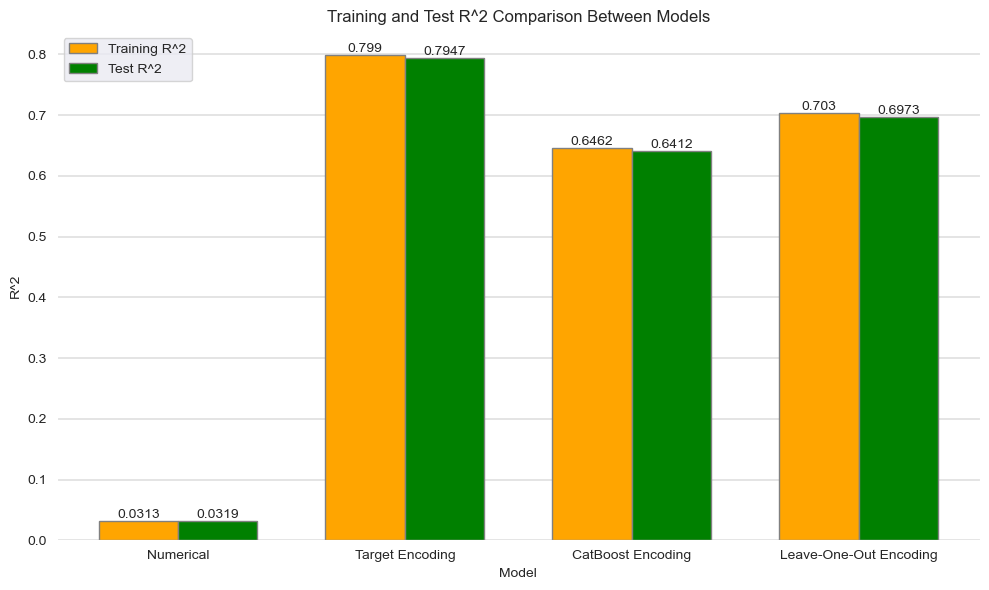

In [78]:
training_r_squared = [max(train_rsquared_num), max(train_rsquared), max(cat_train_rsquared), max(loo_train_rsquared)]
test_r_squared = [max(test_rsquared_num), max(test_rsquared), max(cat_test_rsquared), max(loo_test_rsquared)]

# Histogram plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(bar_1, training_r_squared, color='orange', width=bar_width, edgecolor='grey', label='Training R^2')
bars2 = plt.bar(bar_2, test_r_squared, color='green', width=bar_width, edgecolor='grey', label='Test R^2')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('Training and Test R^2 Comparison Between Models')
plt.xticks([bar + bar_width / 2 for bar in range(len(models))], models)
plt.legend(loc='upper left')
plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y')

# Add labels above the bars
add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

## 6.3) 5-Fold CV Scores Comparison

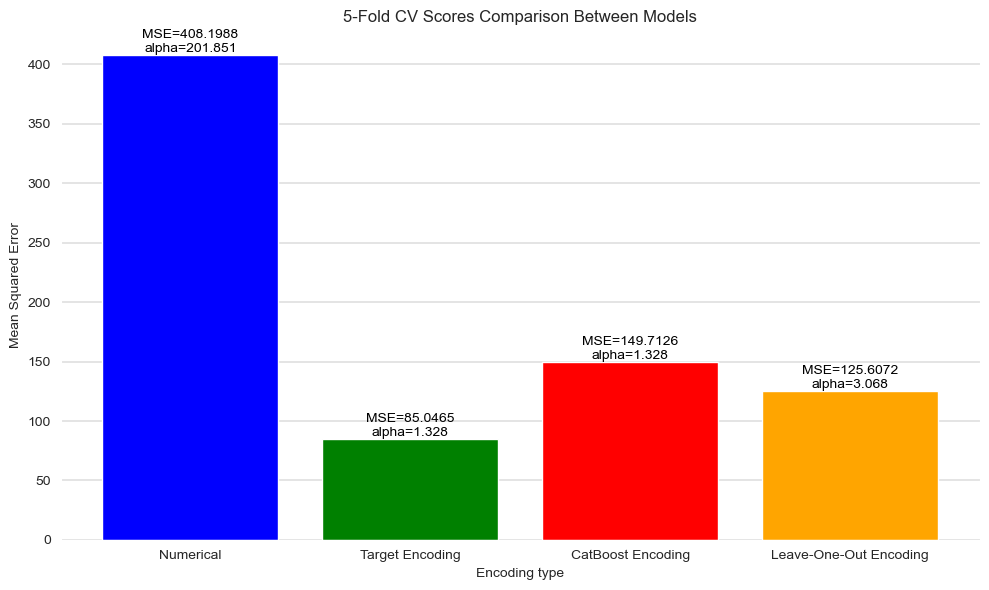

In [79]:
# models = ['Numerical', 'Target Encoding', 'CatBoost Encoding', 'Leave-One-Out Encoding']
cv_scores = [cv_best_mse_num, cv_best_mse_target, cv_best_mse_catboost, cv_best_mse_loo]
alphas = [cv_best_alpha_num, cv_best_alpha_target, cv_best_alpha_catboost, cv_best_alpha_loo]

# Histogram plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, cv_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Encoding type')
plt.ylabel('Mean Squared Error')
plt.title('5-Fold CV Scores Comparison Between Models')

# Add MSE and alpha labels on each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'MSE={cv_scores[i]:.4f}\nalpha={alphas[i]:.3f}', 
             ha='center', va='bottom', color='black', fontsize=10)
    

plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y') 
plt.tight_layout()
plt.show()